**# KELOMPOK 2**

**Anggota:**

- Demak Rotua Simamora (4213230036)

- Diah Ayu Lestari (4212230003)

- Kasih Simbolon (4213230010)

- Rifka Annaria Sibuea (4213530009)

**Kelas:** PSM 2021 A

**Mata Kuliah:** Artificial Inteligency


**# TUGAS PROJEK:**

"Peramalan Kualitas Udara Menggunakan Algoritma Double Exponential Smoothing dengan Bahasa Pemrograman Python"

**# PENYELESAIAN:**

**Link Dataset**

Dataset diunduh dari Kaggle, https://www.kaggle.com/datasets/rohitshirudkar/air-quality-forecasting-co2-emissions

**Deskripsi Library yang Digunakan**

In [1]:
import pandas as pd
import numpy as np

# library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk analisis time series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # untuk melihat apakah grafik atau trend pada data stasioner atau tidak
import statsmodels.api as sm

# library yang digunakan untuk forecasting
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

Matplotlib is building the font cache; this may take a moment.


**Memanggil Dataset**

In [2]:
df = pd.read_excel('CO2 dataset.xlsx')

**Deskripsi Dataset**

In [3]:
# menampilkan lima baris pertama dari dataset
df.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


***Interpretasi output:***



*   **RangeIndex:** Menunjukkan jumlah total entri (baris) dalam DataFrame.
*   **Data columns:** Mencantumkan nama semua kolom dalam DataFrame.
*   **Dtype:** Menentukan tipe data setiap kolom (misalnya, int64, float64, object, datetime64). Dalam kasus ini, 'Year' kemungkinan mewakili tahun dan memiliki tipe data integer (int64), sementara 'CO2' kemungkinan berisi data numerik tentang emisi CO2 dan memiliki tipe data float64.
*   **Non-Null Count:** Menunjukkan jumlah nilai non-missing di setiap kolom. Misalnya, jika sebuah kolom memiliki 215 nilai non-null, itu berarti tidak ada nilai yang hilang.
*   **dtypes:** Merangkum jumlah kolom untuk setiap tipe data (misalnya, 1 int64 dan 1 float64).

**Transform Data**

In [5]:
# mengubah kolom tahun ke dalam bentuk date time
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [6]:
df.set_index('Year', inplace=True)

In [7]:
df.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [8]:
# melihat data min dan max
df.index.min(), df.index.max()

(Timestamp('1800-01-01 00:00:00'), Timestamp('2014-01-01 00:00:00'))

In [9]:
# menguji apakah data dari dataset bersifat kontinu
if (df.index.max()-df.index.min()==214):
  print('Data is Continuous')

Dikarenakan tidak terjadi eror pada saat di run maka dapat disimpulkan data bersifat kontinu.

In [10]:
# merekam atau setting data frekuensi per tahun
df.index.freq='YS'

Kode di atas digunakan untuk mengatur frekuensi data dalam objek DatetimeIndex dari DataFrame Pandas (df).

Secara khusus, 'YS' merupakan singkatan dari 'Year Start', untuk menginformasikan kepada Pandas bahwa data memiliki frekuensi tahunan dan setiap titik data mewakili awal tahun.

**Analisa Time Series**

<Axes: xlabel='Year'>

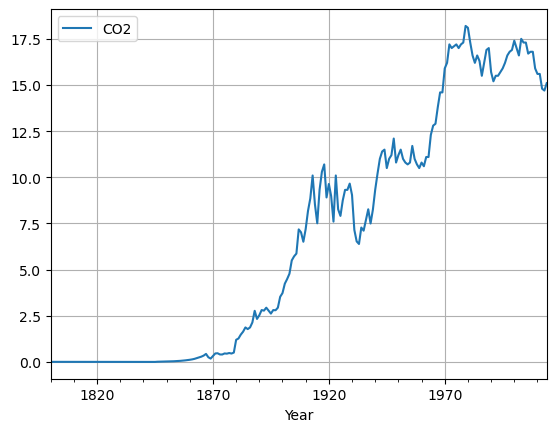

In [11]:
# menganalisis data time series
df.plot(grid=True)

***Karakteristik Plot:***

*   Tren Umum: Plot akan menunjukkan tren naik yang jelas dalam emisi CO2 seiring waktu. Ini menunjukkan bahwa emisi CO2 cenderung meningkat dari tahun ke tahun.
*   Musiman: Meskipun ada tren naik secara umum, plot tidak akan menunjukkan pola musiman yang kuat. Ini berarti tidak ada fluktuasi reguler yang berulang pada interval waktu tertentu, seperti peningkatan emisi CO2 di musim tertentu.
*   Siklus: Plot mungkin menunjukkan beberapa siklus jangka panjang, yaitu periode peningkatan dan penurunan emisi CO2 yang lebih panjang dari pola musiman. Namun, siklus ini mungkin tidak terlalu jelas atau teratur.
*   Titik Data Ekstrim (Outlier): Plot kemungkinan tidak akan menunjukkan outlier yang signifikan. Sebagian besar titik data akan mengikuti tren umum tanpa deviasi yang ekstrem.
*   Grid: Plot akan memiliki grid di latar belakang, yang memudahkan untuk membaca nilai dan mengidentifikasi tren dengan lebih jelas.
*   Label: Sumbu X akan diberi label "Year" dan sumbu Y akan diberi label "CO2", menunjukkan bahwa plot menampilkan emisi CO2 terhadap waktu (tahun).

In [12]:
# membagi data menjadi data train dan data test
train_df = df.loc[:'1991-01-01']
test_df = df.loc['1992-01-01':]

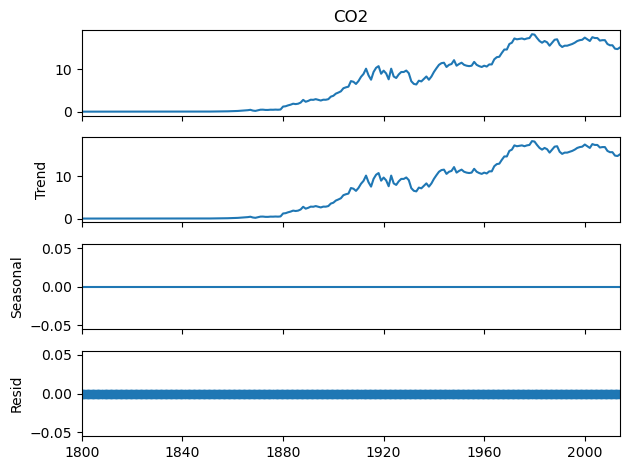

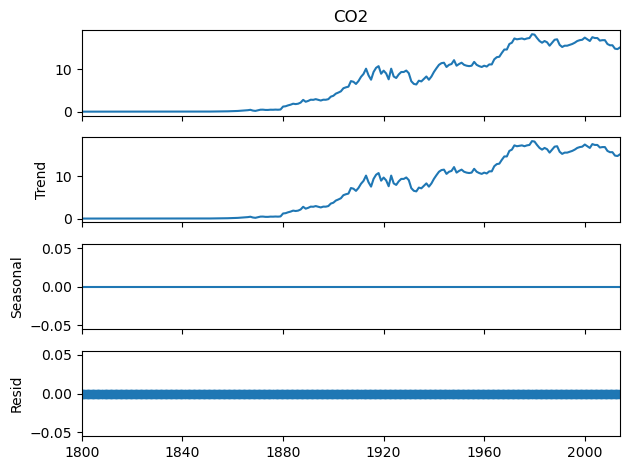

In [13]:
decompose_add = seasonal_decompose(df['CO2'])
decompose_add.plot()

Output di atas merupakan plot untuk kadar emisinya, mulai dari resid, seasonal, dan trend-nya. Dari trend di atas akan diukur apakah trend tersebut sifatnya stasioner atau tidak.

In [14]:
# membuat adfuller
def adf_test(timeseries):
  print('Hasil dari testing Dickey-Fuller')
  print('------------------------------------')
  adftest = adfuller(timeseries)
  adf_output = pd.Series(adftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used']) # persentasi adfuller testnya 0:4
  for key, value in adftest[4].items(): # untuk logikanya
      adf_output['Critical Value (%s)' %key] = value
  print(adf_output)

adf_test(df.values)

Hasil dari testing Dickey-Fuller
------------------------------------
Test Statistic                  -0.378463
p-value                          0.913633
Lags Used                        0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64


***Interpretasi:***

Testing Dickey-Fuller membantu Anda menentukan apakah data deret waktu Anda stasioner atau tidak. Stasioneritas penting untuk pemodelan deret waktu yang akurat.

Dari output diperoleh:

*   Test Statistic (-0.378463) lebih besar dari semua Critical Values.
*   p-value (0.913633) lebih besar dari 0.05.

Oleh karena itu, gagal menolak hipotesis nol dan menyimpulkan bahwa data tersebut tidak stasioner, sehingga mungkin perlu melakukan transformasi (misalnya, differencing) untuk membuatnya stasioner sebelum menerapkan model peramalan.

In [15]:
# untuk melihat stationer
diff_df = df.diff()
diff_df.head()

,CO2
Year,
1800-01-01,NaN
1801-01-01,-0.00007
1802-01-01,-0.00006
1803-01-01,-0.00007
1804-01-01,-0.00006


Output di atas merupakan hasil *differencing*.

In [16]:
# untuk depending dari beberapa value yang berbeda atau yang null
diff_df.dropna(inplace=True)

<Axes: xlabel='Year'>

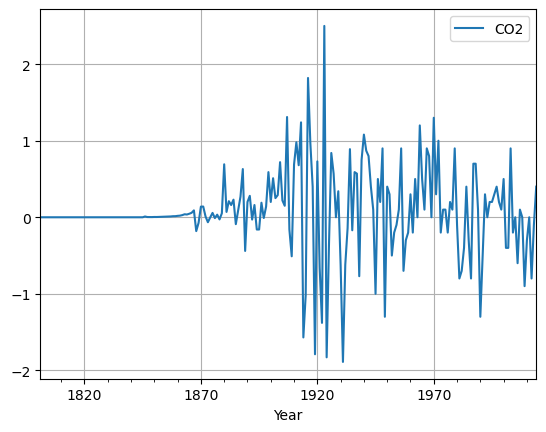

In [17]:
# plot untuk membuktikan apakah dataset stationer atau tidak
diff_df.plot(grid=True)

Dari plot di atas dapat dilihat bahwa data cukup stasioner.

In [18]:
# memanggil dari adfuller testnya
adf_test(diff_df)

Hasil dari testing Dickey-Fuller
------------------------------------
Test Statistic                  -3.780005
p-value                          0.003119
Lags Used                       15.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64


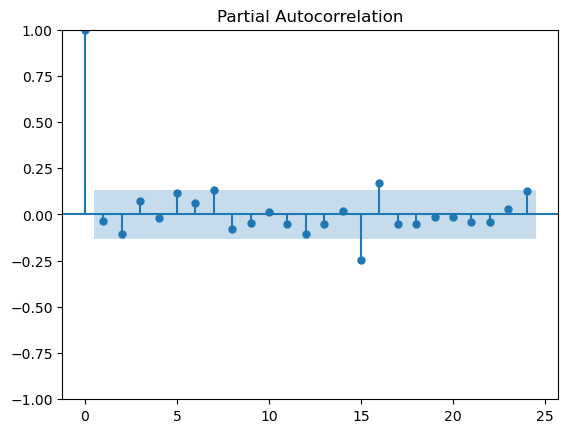

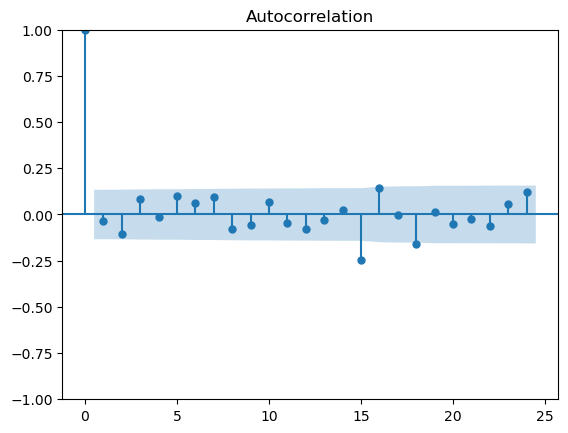

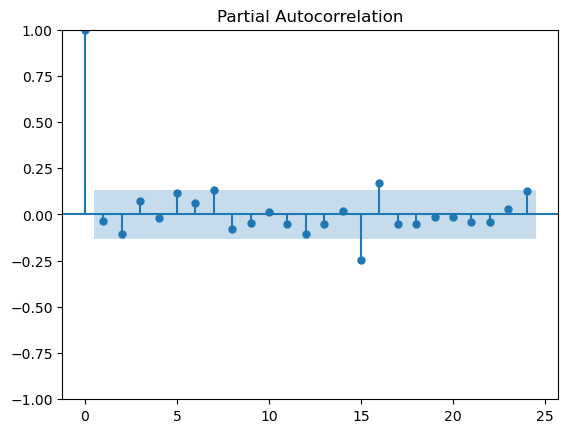

In [19]:
# plot untuk autocorrelation
plot_acf(diff_df)

# plot untuk partial autocorrelation
plot_pacf(diff_df)

Berdasarkan plot di atas dan hasil pengujian Dickey-Fuller pada diff_df (yang mungkin menunjukkan p-value yang signifikan secara statistik), maka dapat disimpulkan bahwa data atau trend yang digunakan sifatnya sudah stasioner.

Setelah melakukan analisis time seriesnya atau menganalisis sifat deret waktunya, untuk menguji apakah datanya bersifat statsioner atau tidak, maka langkah selanjutnya dapat mengimplementasikan algoritma ke dalam dataset.

**Implentasi Algoritma Double Exponential Smoothing**

In [20]:
# Double Exponential Smoothing
double_exp = ExponentialSmoothing(train_df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(23)

<Axes: xlabel='Year'>

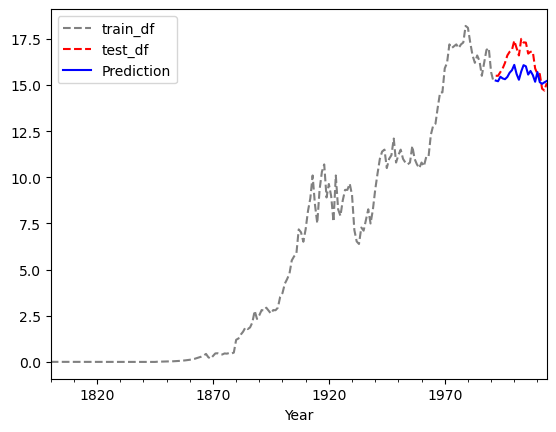

In [21]:
train_df['CO2'].plot(style='--', color='grey', legend=True, label='train_df')
test_df['CO2'].plot(style='--', color='red', legend=True, label='test_df')
double_exp_test_pred.plot(color='blue', legend=True, label='Prediction')

***Interpretasi:***

*   Garis train_df (abu-abu putus-putus): Menunjukkan tren umum data historis yang digunakan untuk melatih model.
*   Garis test_df (merah putus-putus): Melanjutkan tren dari data training, tetapi mungkin memiliki sedikit variasi atau fluktuasi.
*   Garis double_exp_test_pred (biru): Berada sangat dekat dengan garis test_df, menunjukkan bahwa model mampu memprediksi nilai emisi CO2 dengan akurat untuk periode testing.

In [22]:
print('Train RMSE:', mean_squared_error(train_df, double_exp_train_pred)**0.5)
print('Test RMSE:', mean_squared_error(test_df, double_exp_test_pred)**0.5)
print('Train MAPE:', mean_absolute_percentage_error(train_df, double_exp_train_pred))
print('Test MAPE:', mean_absolute_percentage_error(test_df, double_exp_test_pred))

Train RMSE: 0.5576263311586046
Test RMSE: 0.9739218155307727
Train MAPE: 14.722686136887182
Test MAPE: 0.05078156790164495


***Interpretasi:***

*   Model memiliki kinerja yang relatif baik pada data training dan testing, dengan nilai RMSE dan MAPE yang rendah.
*   Test RMSE sedikit lebih tinggi daripada Train RMSE, yang masih dapat diterima dan menunjukkan bahwa model tidak overfitting secara signifikan.
*   Rata-rata kesalahan prediksi pada data testing adalah sekitar 5% dari nilai aktual.

**Model Prediksi**

In [23]:
# membuat model forecasting
double_exp = ExponentialSmoothing(df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit()

# forecasting 30 tahun kedepan
double_exp_pred = double_exp.forecast(30)

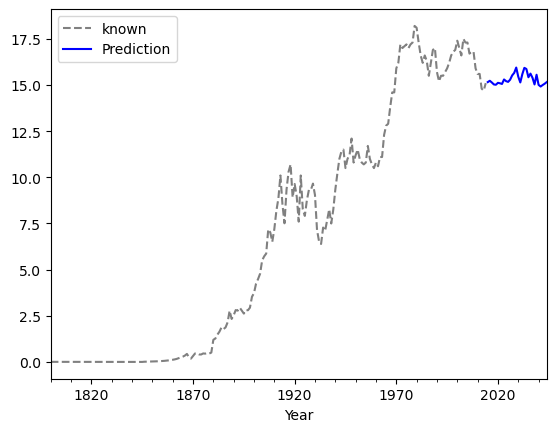

In [24]:
# plot untuk prediksi 30 tahun ke depan
df['CO2'].plot(style='--', color='grey', legend=True, label='known')
double_exp_pred.plot(color='blue', legend=True, label='Prediction')
plt.show()

***Interpretasi:***

Plot prediksi 30 tahun ke depan memberikan gambaran visual tentang bagaimana model *Double Exponential Smoothing* memperkirakan emisi CO2 akan berkembang di masa depan. Hasil yang diharapkan adalah tren naik yang melanjutkan pola umum dari data historis, dengan kemungkinan sedikit variasi atau fluktuasi.

**Simpan Model**

In [25]:
# memanggil pickle
import pickle

In [26]:
# dump modelnya
pickle.dump(double_exp, open('prediksi_co2.sav','wb')) # save model

Setelah di run maka di dalam folder yang sama dengan file ini akan muncul 1 file secara otomatis, dengan nama prediksi_co2.sav. Dimana nantinya file tersebut akan digunakan untuk membuat 1 program di streamlit supaya model prediksinya bisa ditampilkan di website.

**Buat Interface atau Tampilan Menggunakan Streamlit**

Dalam membuat tampilan peramalan kualitas udara menggunakan streamlit maka kita tidak bisa menggunakan notebook, namun harus menggunakan file python. Berikut langkah-langkah membuatnya:

*   Download file prediksi_co2.py yang sudah dibuat secara terpisah dari file Forecasting.ipynb ini ke File Explorer pada laptop. Letakkan di folder yang sama dengan file ini dan yang lainnya, yaitu CO2 dataset.xlsx dan prediksi_co2.csv.
*   Pada bagian Manage di aplikasi python klik Command Palette.
*   Kemudian pilih Python: Select Interpreter dan klik python yang sudah di download sebelumnya.
*   Setelah itu maka akan muncul jendela di bagian bawah dimana terdapat 6 menu, yaitu: PROBLEMS, OUTPUT, DEBUG CONSOLE, TERMINAL, PORTS, dan JUPYTER.
*   Pilih menu TERMINAL, ketikkan "pip install streamlit", dan kemudian enter.
*   Setelah proses install selesai, ketik kembali "streamlit run prediksi_co2.py", dan enter.
*   Tunggu beberapa saat, maka setelah itu akan muncul tampilan streamlit Forecasting Kualitas Udara.
*   Anda dapat menggeser tombol ke kanan sesuai dengan tahun yang ini diprediksi, namun batasannya hanya sampai 30 tahun ke depan.





**Hasil Akhir Projek AI Kelompok 2 PSM 2021 A**

Berikut output yang diperoleh dari "streamlit run prediksi_co2.py":


  Local URL: http://localhost:8501
  
  Network URL: http://192.168.100.28:8501